In [1]:
!git clone https://github.com/AlexeyAB/darknet

Cloning into 'darknet'...
remote: Enumerating objects: 15494, done.
remote: Counting objects: 100% (4/4), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 15494 (delta 0), reused 3 (delta 0), pack-reused 15490
Receiving objects: 100% (15494/15494), 14.11 MiB | 17.92 MiB/s, done.
Resolving deltas: 100% (10409/10409), done.


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# change makefile to have GPU and OPENCV enabled
%cd darknet
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile

/content/darknet


In [4]:
# verify CUDA
!/usr/local/cuda/bin/nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2020 NVIDIA Corporation
Built on Mon_Oct_12_20:09:46_PDT_2020
Cuda compilation tools, release 11.1, V11.1.105
Build cuda_11.1.TC455_06.29190527_0


In [5]:
# make darknet (build)
!make

mkdir -p ./obj/
mkdir -p backup
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:946:23: warning: variable ‘rgb’ set but not used [-Wunused-but-set-variable]
                 float rgb[3];
                       ^~~
./src/image_opencv.cpp: In function ‘void draw_train_loss(char*, void**, int, float, float, int, int, float, int, char*, float, int, int, double)’:
./src/image_opencv.cpp:1147:13: warning: this ‘if’ clause does not guard... [-Wmisleading-indentation]
             if (iteration_old == 0)
             ^~
./src/image_

In [6]:
#Download the dataset from google drive
import os.path
import shutil
from google.colab import drive

if not os.path.exists('/content/drive'):
  drive.mount('/content/drive')
  
DOWNLOAD_LOCATION = '/content/darknet/data/'
DRIVE_DATASET_FILE = '/content/drive/My Drive/yolov3/Yolov3_OID.zip' #adjust path/name of dataset which is in your G-drive

shutil.copy(DRIVE_DATASET_FILE, DOWNLOAD_LOCATION)

print('Successfully downloaded the dataset')

Successfully downloaded the dataset


In [ ]:
!unzip data/Yolov3_OID.zip -d data/ # adjust the dataset filename which you have downloaded from Google drive

In [ ]:
!wget https://pjreddie.com/media/files/darknet53.conv.74

In [9]:
import os.path
import shutil
from google.colab import drive
 
if not os.path.exists('/content/drive'):
  drive.mount('/content/drive')
  
DOWNLOAD_LOCATION_cfg = '/content/darknet/cfg/'
DOWNLOAD_LOCATION_weights = '/content/darknet/backup/'
DRIVE_CFG_FILE = '/content/drive/My Drive/yolov3/backup/yolov3.cfg' #adjust path/name of dataset which is in your G-drive
DRIVE_WEIGHTS_FILE = '/content/drive/My Drive/yolov3/backup/yolov3_20000.weights'
 
shutil.copy(DRIVE_CFG_FILE, DOWNLOAD_LOCATION_cfg)
shutil.copy(DRIVE_WEIGHTS_FILE, DOWNLOAD_LOCATION_weights)
print('Successfully downloaded cfg and weights file')

Successfully downloaded cfg and weights file


In [ ]:
#train a fresh model
#!./darknet detector train data/obj.data cfg/yolov3.cfg darknet53.conv.74 -dont_show
 
# retrain previous saved weight
!./darknet detector train data/obj.data cfg/yolov3.cfg backup/yolov3_last.weights -dont_show

In [11]:
#Download the training files to google drive
import os.path
import shutil
from google.colab import drive

if not os.path.exists('/content/drive'):
  drive.mount('/content/drive')
  
YOLO_BACKUP = '/content/darknet/backup/yolov3_20000.weights' #adjust the backup file name or keep it default
YOLOCFG_BACKUP = '/content/darknet/cfg/yolov3.cfg' #adjust the backup file name or keep it default
DRIVE_DIR = '/content/drive/My Drive/yolov3/backup/' #adjust path in your Google drive, or keep it default
shutil.copy(YOLO_BACKUP, DRIVE_DIR)
shutil.copy(YOLOCFG_BACKUP, DRIVE_DIR)

print('Saved training data to drive at: ' + DRIVE_DIR)

Saved training data to drive at: /content/drive/My Drive/yolov3/backup/


In [12]:
# need to set our custom cfg to test mode 
%cd cfg
!sed -i 's/batch=64/batch=1/' yolov3.cfg
!sed -i 's/subdivisions=16/subdivisions=1/' yolov3.cfg
%cd ..

/content/darknet/cfg
/content/darknet


In [13]:
# define helper functions
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()

# use this to upload files
def upload():
  from google.colab import files
  uploaded = files.upload() 
  for name, data in uploaded.items():
    with open(name, 'wb') as f:
      f.write(data)
      print ('saved file', name)

# use this to download a file  
def download(path):
  from google.colab import files
  files.download(path)

 CUDA-version: 11010 (11020), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 750, cudnn_half = 0, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5,  

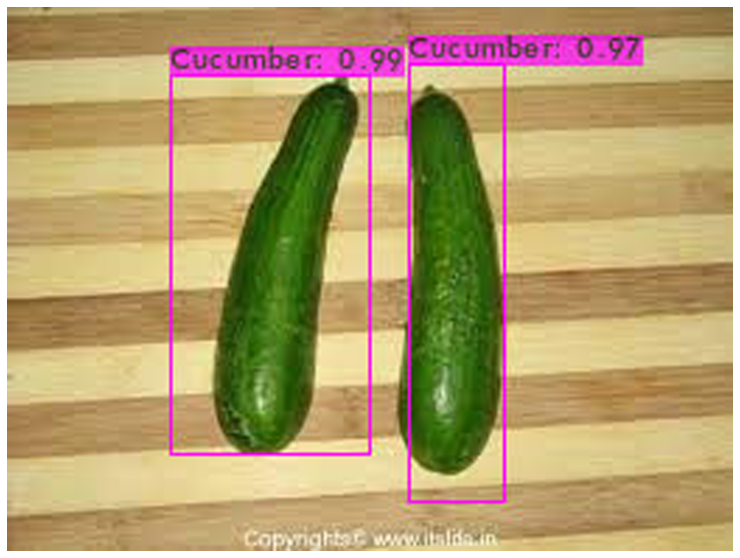

In [16]:
# run your custom detector with this command (upload an image to your google drive to test, thresh flag sets accuracy that detection must be in order to show it)
!./darknet detector test data/obj.data cfg/yolov3.cfg backup/yolov3_20000.weights data/c.jpg -dont_show
imShow('predictions.jpg')